# <center>Задача кластеризации. K-Means.</center>

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/k-means-clustering-algorithm-in-machine-learning.png" width="1000px"/>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;
%matplotlib inline

### Загрузка данных iris из sklearn

In [2]:
from sklearn import datasets

# загружаем готовый датасет из sklearn
iris = datasets.load_iris()
X = iris.data
y = iris.target
pd.DataFrame(X)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


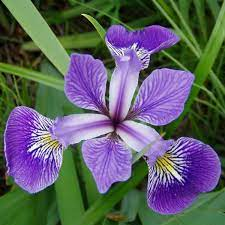

**Iris Dataset Attribute Information**:

Рассмотрим известный набор данных под названием Ирисы Фишера. Набор данных содержит 3 класса по 50 экземпляров в каждом, где каждый класс относится к типу ириса. Объекты описываются следующими признаками:

1.   Длина наружной доли околоцветника (англ. sepal length).
2.   Ширина наружной доли околоцветника (англ. sepal width).
3.   Длина внутренней доли околоцветника (англ. petal length).
4.   Ширина внутренней доли околоцветника (англ. petal width).

Прогнозируемый признак: класс ирисовых растений. Произведем кластеризацию на $K=3$ кластера методом К-средних.

In [3]:
pd.Series(y).unique()

array([0, 1, 2])

### Кластеризация для Iris Dataset

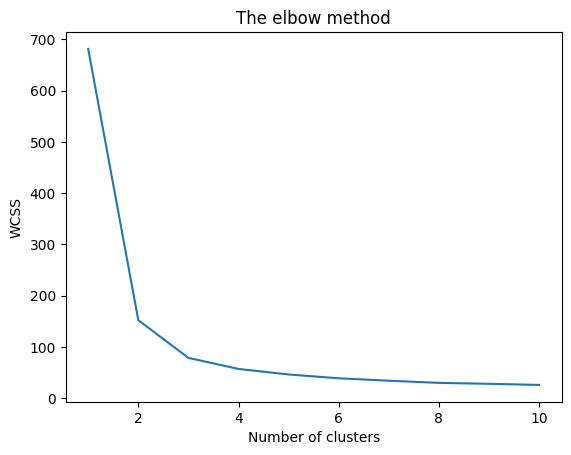

In [13]:
from sklearn.cluster import KMeans
X = iris.data
y = iris.target
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [14]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

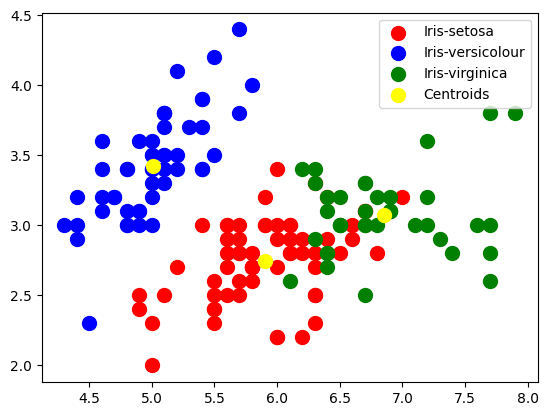

In [15]:
#Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

### Оценим качество разбиений на кластера

The Silhouette Coefficient is defined for each sample and is composed of two scores:

- a: The mean distance between a sample and all other points in the same class.
- b: The mean distance between a sample and all other points in the next nearest cluster.

The Silhouette Coefficient s for a single sample is then given as:

$$s = \frac{b - a}{max(a, b)}$$

The Silhouette Coefficient for a set of samples is given as the mean of the Silhouette Coefficient for each sample.

In [16]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For n_clusters = 2 The average silhouette_score is : 0.6810461692117462
For n_clusters = 3 The average silhouette_score is : 0.5528190123564095
For n_clusters = 4 The average silhouette_score is : 0.49805050499728726
For n_clusters = 5 The average silhouette_score is : 0.4887488870931055
For n_clusters = 6 The average silhouette_score is : 0.36784649847122436


Например, для этого алгоритма и метрики Silhouette разбиение на 2 кластера кажется наиболее оптимальным.